# Servicios Web y APIs 

## Índice
1. [API Air Quality](#air)
2. [API de OpenWeather](#wea)
3. [API de la NASA](#nasa)
4. [Yahoo Finance](#yah)

En este Notebook vamos a llamar a diversas APIs. Antes de comenzar, es importante destacar dos conceptos:  

1) **Codificación de URLs**: Toda cadena de cadena de caracteres que se introduzca en una URL tiene que codificarse adecuadamente. En Python, podemos utilizar la función `quote()` del paquete `urllib.parse`

In [2]:
import urllib.parse
urllib.parse.quote('ñ')

'%C3%B1'

2) **Peticiones HTTP**: la librería `requests` es la más utilizada para realizar peticiones HTTP en Python, permitiendo utilizar los métodos más comunes de este protocolo (GET, POST, PUT, etc.). Para más información entra en este [enlace](https://realpython.com/python-requests/)

También podemos utilizar la librería `urllib.request`

<a id="air"></a>
## API Air Quality

Esta API abierta proporciona información acerca de la calidad del aire en diversas ciudades. La lista de APIS se encuentra en https://api.openaq.org/  

En primer lugar vamos a llamar a la API **cities**, la cual nos informa de las ciudades disponibles

In [10]:
import urllib.request
import json

endpoint = 'https://api.openaq.org/v2/cities'
pais = 'ES'

url = endpoint + '?country=' + pais
print(url)

datos = urllib.request.urlopen(url).read().decode()

js = json.loads(datos)
for item in js['results']:
    print(item['city'])

https://api.openaq.org/v2/cities?country=ES
ABANTO Y CIÉRVANA/ABANTO ZIERBENA
A Coruña
Agullana
AIA
ALAGÓN
ALBACETE
ALBALAT DELS TARONGERS
ALCALÁ DE GUADAIRA
ALCALÁ DE HENARES
Alcanar
ALCANTARILLA
ALCOBENDAS
ALCORA (L')
ALCORCÓN
ALCOVER
ALCOY/ALCOI
ALFARO
ALGAR DE PALANCIA
ALGECIRAS
ALGETE
ALICANTE/ALACANT
ALMAZORA/ALMASSORA
Almería
ALMERÍA
ALMONTE
ALTSASU/ALSASUA
ALZIRA
AMOREBIETA-ETXANO
Amposta
ANDOAIN
Araba/Álava
ARANDA DE DUERO
ARANJUEZ
ARCOS DE LA FRONTERA
ARGANDA DEL REY
ARMILLA
ARRASATE O MONDRAGÓN
ARRÚBAL
ARTEIXO
ASTILLERO (EL)
Asturias
ATAZAR (EL)
ÁVILA
AVILÉS
AZPEITIA
AZUQUECA DE HENARES
Badajoz
BADAJOZ
Badalona
BAILÉN
BARAKALDO
BARBERÀ DEL VALLÈS
BARCARROTA
Barcelona
BARCELONA
BARRIOS (LOS)
BASAURI
BEASAIN
BÉDAR
BENAHADUX
BENICASIM/BENICÀSSIM
BENIDORM
BENIGÁNIM
Berga
BILBAO
Bizkaia
BUJARALOZ
BUÑOL
BURGOS
BURGUILLOS DEL CERRO
BURJASSOT
BURÓN
BURRIANA
CÁCERES
CÁDIZ
CALANDA
CALATAYUD
CAMARGO
CAMPILLOS
CAMPISÁBALOS
CANGAS DEL NARCEA
CARAVACA DE LA CRUZ
CARBONERAS
CARRACEDELO
CAR

Esto mismo podemos realizarlo con la librería `requests`, instalándola previamente.  
Esta librería también me permite utilizar el método POST de HTTP: `requests.post(...)`

In [12]:
import requests

endpoint = 'https://api.openaq.org/v2/cities'
pais = 'ES'

datos = requests.get(endpoint, params={'country':pais})

# Si quiero el string (JSON)
datos.text

# Si quiero el diccionario
js = datos.json()

for item in js['results']:
    print(item['city'])

ABANTO Y CIÉRVANA/ABANTO ZIERBENA
A Coruña
Agullana
AIA
ALAGÓN
ALBACETE
ALBALAT DELS TARONGERS
ALCALÁ DE GUADAIRA
ALCALÁ DE HENARES
Alcanar
ALCANTARILLA
ALCOBENDAS
ALCORA (L')
ALCORCÓN
ALCOVER
ALCOY/ALCOI
ALFARO
ALGAR DE PALANCIA
ALGECIRAS
ALGETE
ALICANTE/ALACANT
ALMAZORA/ALMASSORA
Almería
ALMERÍA
ALMONTE
ALTSASU/ALSASUA
ALZIRA
AMOREBIETA-ETXANO
Amposta
ANDOAIN
Araba/Álava
ARANDA DE DUERO
ARANJUEZ
ARCOS DE LA FRONTERA
ARGANDA DEL REY
ARMILLA
ARRASATE O MONDRAGÓN
ARRÚBAL
ARTEIXO
ASTILLERO (EL)
Asturias
ATAZAR (EL)
ÁVILA
AVILÉS
AZPEITIA
AZUQUECA DE HENARES
Badajoz
BADAJOZ
Badalona
BAILÉN
BARAKALDO
BARBERÀ DEL VALLÈS
BARCARROTA
Barcelona
BARCELONA
BARRIOS (LOS)
BASAURI
BEASAIN
BÉDAR
BENAHADUX
BENICASIM/BENICÀSSIM
BENIDORM
BENIGÁNIM
Berga
BILBAO
Bizkaia
BUJARALOZ
BUÑOL
BURGOS
BURGUILLOS DEL CERRO
BURJASSOT
BURÓN
BURRIANA
CÁCERES
CÁDIZ
CALANDA
CALATAYUD
CAMARGO
CAMPILLOS
CAMPISÁBALOS
CANGAS DEL NARCEA
CARAVACA DE LA CRUZ
CARBONERAS
CARRACEDELO
CARTAGENA
CASTELLÓN DE LA PLANA/CASTELLÓ DE LA 

A continuación, llamamos a la API **latest**, que devuelve los últimos registros de una ciudad o país en concreto

In [27]:
ciudad = 'A Coruña'
endpoint = 'https://api.openaq.org/v1/latest'

datos = requests.get(endpoint,params={'city':ciudad, 'limit':1})
datos.text

'{"meta":{"name":"openaq-api","license":"","website":"/","page":1,"limit":1,"found":15},"results":[{"location":"ES1867A","city":"A Coruña","country":"ES","coordinates":{"latitude":43.48055554946381,"longitude":-8.24138888},"measurements":[{"parameter":"pm10","value":23.0,"lastUpdated":"2024-01-29T19:00:00+00:00","unit":"µg/m³","sourceName":"EEA Spain","averagingPeriod":{"value":3600,"unit":"seconds"}},{"parameter":"pm25","value":9.0,"lastUpdated":"2024-01-29T19:00:00+00:00","unit":"µg/m³","sourceName":"EEA Spain","averagingPeriod":{"value":3600,"unit":"seconds"}},{"parameter":"no2","value":18.0,"lastUpdated":"2024-01-29T20:00:00+00:00","unit":"µg/m³","sourceName":"EEA Spain","averagingPeriod":{"value":3600,"unit":"seconds"}},{"parameter":"o3","value":36.0,"lastUpdated":"2024-01-29T20:00:00+00:00","unit":"µg/m³","sourceName":"EEA Spain","averagingPeriod":{"value":3600,"unit":"seconds"}},{"parameter":"no","value":1.0,"lastUpdated":"2024-01-02T00:00:00+00:00","unit":"µg/m³","sourceName":"

In [18]:
print(endpoint + '?city=' + ciudad + '&limit=1')

https://api.openaq.org/v2/latest?city=Madrid&limit=1


Parseamos el JSON de respuesta para obtener todos los niveles disponibles y la fecha de las mediciones

In [28]:
js = datos.json()
for item in js['results'][0]['measurements']:
    print('El valor de', item['parameter'], 'en', ciudad,
         'a fecha de', item['lastUpdated'], 'es de',
         item['value'], item['unit'])

El valor de pm10 en A Coruña a fecha de 2024-01-29T19:00:00+00:00 es de 23.0 µg/m³
El valor de pm25 en A Coruña a fecha de 2024-01-29T19:00:00+00:00 es de 9.0 µg/m³
El valor de no2 en A Coruña a fecha de 2024-01-29T20:00:00+00:00 es de 18.0 µg/m³
El valor de o3 en A Coruña a fecha de 2024-01-29T20:00:00+00:00 es de 36.0 µg/m³
El valor de no en A Coruña a fecha de 2024-01-02T00:00:00+00:00 es de 1.0 µg/m³
El valor de so2 en A Coruña a fecha de 2024-01-29T19:00:00+00:00 es de 1.3 µg/m³
El valor de co en A Coruña a fecha de 2024-01-29T20:00:00+00:00 es de 200.0 µg/m³


<a id="wea"></a>
## API de OpenWeather

Esta API permite obtener información climática. Puedes encontrar la documentación en https://openweathermap.org/api.   
Para obtener la API key hay que registrar un email válido, al cual será enviada la clave.  

Vamos a obtener la predicción de velocidad del viento para una ciudad a través de [esta API](https://openweathermap.org/forecast5)

In [30]:
api_key = '3886d5996f84c5b9a5c953b027fc2306'
url = 'https://api.openweathermap.org/data/2.5/forecast' #?q={city name},{country code}&appid={API key}
ciudad = 'Santander,ES'

datos = requests.get(url, params={'q':ciudad, 'appid':api_key})
# datos.text

js = datos.json()

ts = []
speed = []

for item in js['list']:
    ts.append(item['dt_txt'])
    speed.append(item['wind']['speed'])

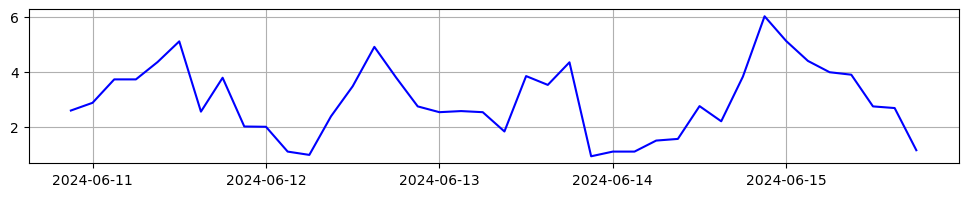

In [36]:
from datetime import datetime
import matplotlib.pyplot as plt

ts2 = [datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in ts]

fig = plt.figure(figsize=(12,2))
plt.grid()
plt.plot(ts2, speed, color='blue')

<a id="nasa"></a>
## API de la NASA
[Documentación](https://api.nasa.gov/)  
Vamos a obtener fotos de marte a través de la API "Mars Rover Photos" del día 01/09/2022

In [40]:
import requests
endpoint = 'https://api.nasa.gov/mars-photos/api/v1/rovers/curiosity/photos'

res = requests.get(endpoint, params = {'api_key':'DEMO_KEY',
                                     'earth_date':'2023-10-11'})

In [41]:
print(res.text)

{"photos":[{"id":1199634,"sol":3974,"camera":{"id":20,"name":"FHAZ","rover_id":5,"full_name":"Front Hazard Avoidance Camera"},"img_src":"https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03974/opgs/edr/fcam/FLB_750281752EDR_F1050418FHAZ00302M_.JPG","earth_date":"2023-10-11","rover":{"id":5,"name":"Curiosity","landing_date":"2012-08-06","launch_date":"2011-11-26","status":"active","max_sol":4102,"max_date":"2024-02-19","total_photos":695670,"cameras":[{"name":"FHAZ","full_name":"Front Hazard Avoidance Camera"},{"name":"NAVCAM","full_name":"Navigation Camera"},{"name":"MAST","full_name":"Mast Camera"},{"name":"CHEMCAM","full_name":"Chemistry and Camera Complex"},{"name":"MAHLI","full_name":"Mars Hand Lens Imager"},{"name":"MARDI","full_name":"Mars Descent Imager"},{"name":"RHAZ","full_name":"Rear Hazard Avoidance Camera"}]}},{"id":1199635,"sol":3974,"camera":{"id":20,"name":"FHAZ","rover_id":5,"full_name":"Front Hazard Avoidance Camera"},"img_src":"https://mars.nasa.go

In [42]:
foto_url = res.json()['photos'][0]['img_src']
print(foto_url)

https://mars.nasa.gov/msl-raw-images/proj/msl/redops/ods/surface/sol/03974/opgs/edr/fcam/FLB_750281752EDR_F1050418FHAZ00302M_.JPG


In [43]:
from IPython.display import Image
display(Image(url=foto_url))

<a id="yah"></a>
## Yahoo Finance
Muchas veces, usamos APIs a través de librerías de Python. Por ejemplo, la librería `yfinance` permite conectarnos a la API de Yahoo finance. Puedes encontrar la documentación en [este enlace](https://aroussi.com/post/python-yahoo-finance)

In [44]:
import yfinance as yf

In [45]:
data = yf.download('MSFT', period='5d', interval='1m')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-06-04 09:30:00-04:00,412.079987,412.500000,410.910004,411.140015,411.140015,537645
2024-06-04 09:31:00-04:00,411.140015,411.209991,410.640015,410.929993,410.929993,75536
2024-06-04 09:32:00-04:00,410.989990,411.290009,410.190002,410.535004,410.535004,78019
2024-06-04 09:33:00-04:00,410.572388,410.690002,409.674988,409.820007,409.820007,98417
2024-06-04 09:34:00-04:00,409.785004,410.339996,409.730011,410.290009,410.290009,95906
...,...,...,...,...,...,...
2024-06-10 14:42:00-04:00,426.407990,426.540009,426.200104,426.200104,426.200104,37391
2024-06-10 14:43:00-04:00,426.200012,426.415985,426.165009,426.399994,426.399994,23771
2024-06-10 14:44:00-04:00,426.440002,426.510010,426.440002,426.489990,426.489990,13523


In [46]:
data2 = yf.download('AAPL', period = '5d', interval = '1m')
data2

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2024-06-04 09:30:00-04:00,194.720001,195.000000,194.710007,194.880005,194.880005,2254383
2024-06-04 09:31:00-04:00,194.839996,194.860001,194.589996,194.764999,194.764999,187306
2024-06-04 09:32:00-04:00,194.779999,194.875000,194.460007,194.609894,194.609894,168874
2024-06-04 09:33:00-04:00,194.610001,194.619995,194.119995,194.129898,194.129898,175474
2024-06-04 09:34:00-04:00,194.130005,194.449997,193.850006,193.899994,193.899994,301344
...,...,...,...,...,...,...
2024-06-10 14:43:00-04:00,193.250000,193.929993,192.899994,193.630005,193.630005,690901
2024-06-10 14:44:00-04:00,193.604996,193.880005,193.570007,193.669998,193.669998,281381
2024-06-10 14:45:00-04:00,193.690002,194.199997,193.570007,193.679993,193.679993,466591


In [49]:
data3 = data.merge(data2, right_index=True, left_index=True)
data3[['Close_x', 'Close_y']].corr()

,Close_x,Close_y
Close_x,1.000000,0.612698
Close_y,0.612698,1.000000


<Axes: xlabel='Close_x', ylabel='Close_y'>

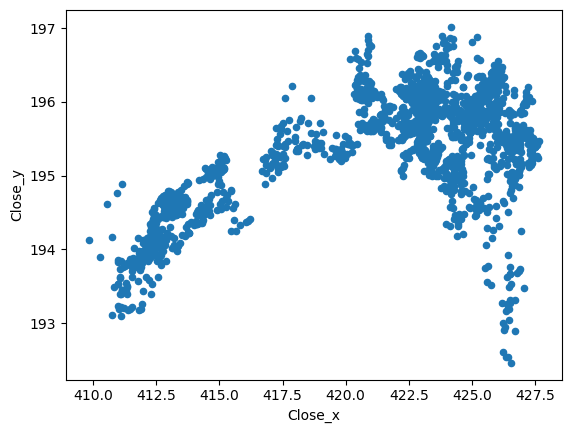

In [52]:
data3[['Close_x', 'Close_y']].plot.scatter('Close_x','Close_y')